## EXE - 2
### Submitted by:
### Jasmeet Kaur


_____________________________________________________________________________________________________________________________

Table of Contents:
1. Business Problem
2. Importing the Dataset
3. Exploratory Data Analysis (EDA) <br>
  3.1 Data Overview <br>
  3.2 Data Cleaning/ Data wrangling (Deleting Duplicate Lines, Dropping irrelevant columns etc.)<br>
  3.3 EDA Report for Statistical Analysis <br>
  3.4 Report: Making Donought chart for patient Classification in data <br>
  3.5 Statistical Analysis <br>
  3.6 Correlation Map <br>
  3.7 Outlier Analysis <br> 
4. Data Preprocessing
  4.1 Outlier Management <br>
  4.2 Feature Engineering and Selection <br>
5. Model Preparation
  5.1 Splitting the dataset into Train and Test Sets <br>
  5.2 Feature Scaling <br>
6. Machine Learning Models
  6.1 Decision Tree <br>
  6.2 Random Forest <br>
  6.3 KNN <br>
7. Hyper parameter Tuning
  7.1 Decision Tree <br>
  7.2 Random Forest <br>
  7.3 KNN <br>
8. Summary :Comparison of Models Before and after Hyper parameter tuning 
9. Cross Validation
10. Conclusion


## 1. Business Problem
Finding breast cancer early and getting state-of-the-art cancer treatment are two of the most important strategies for preventing deaths from breast cancer. Breast cancer that’s found early, when it’s small and has not spread, is easier to treat successfully. In this work we will apply a breast cancer classification with KNN algorithm, DT Algorithm and Random Forest Algorithm.

<b>Dataset Information:</b><br>
The dataset contains 569 rows and 32 columns of tumor shape and specifications. The tumor is classified as benign or malignant based on its geometry and shape. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, which is type of biopsy procedure. They describe characteristics of the cell nuclei present in the image.

The features of the dataset include:

1. tumor radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter² / area — 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension

### Importing required modules

In [1]:
!pip install sweetviz
import sweetviz as sv
import numpy as np 
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import  Image
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor


## 2. Importing the dataset

In [2]:
#Reading the dataset stored as a .csv file.
dataset = pd.read_csv("C:/Users/100902467/Desktop/AI Algo/EX-2/dataset.csv")

#Displaying the first five rows of the dataset.
dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


## 3. Exploratory Data Analysis

#### 3.1 Data overview

In [3]:
# Basic data statistics
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  ", dataset.isnull().sum().values.sum())
print ("Unique values  :  \n",dataset.nunique())



Rows     :  569
Columns  :  32

Features : 
 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'points_se', 'symmetry_se', 'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']

Missing values :   0
Unique values  :  
 id                   569
diagnosis              2
radius_mean          456
texture_mean         479
perimeter_mean       522
area_mean            539
smoothness_mean      474
compactness_mean     537
concavity_mean       537
points_mean          542
symmetry_mean        432
dimension_mean       499
radius_se            540
texture_se           519
perimeter_se         533
area_se              

#### 3.2 Data Cleaning/ Data wrangling

In [4]:
# Dropping id column as it is of no use
dataset = dataset.drop('id', axis = 1)

In [5]:
#Separating benign and malignant patients.
benign     = dataset[dataset["diagnosis"] == "B"]
malignant = dataset[dataset["diagnosis"] == "M"]

#Assigning numercial values to catagorical target column.
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1,'B':0})



In [6]:
# Deleting Duplicate Lines and keeping last record
dataset = dataset.drop_duplicates(keep='last')
#Checking number of rows
dataset.shape[0]

569

##### The number of rows is same as before so no duplicate records were there in dataset

#### 3.3 EDA Report for Statistical Analysis

#### 3.3.1 Using sweetviz module to generate html report
The analyze module will be used to generate report

In [7]:
eda_report = sv.analyze(dataset)
eda_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### From the report it can be seen that all features have no missing values. Also, all variables except the Target variable 'diagnosis' i.e. all feature labels have no zeros

#### 3.4 Report: Making Donought chart for patient Classification in data

In [8]:
l = ['Benign', 'Malignant']
v = dataset["diagnosis"].value_counts().values.tolist()

trace = go.Pie(labels = l, values = v,
               marker = dict(colors =  [ 'blue' ,'orange'], line = dict(color = "white", width =  1.3)),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Patient Classification in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

<b> Conclusion </b>: The dataset contains information of patients where 37.3% have Malignant tumor and 62.7% have benign tumor


#### 3.5 Statistical Analysis

##### 3.5.1 Statistical Summary: 
Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. It shows the data type of variables and count of non null values for the variables

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    int64  
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

From the above results it can be inferred all the features except diagnosis are of floating type. Only diagnosis is a binary object. Also none of the feature contains null value and have all 569 records.

##### 3.5.2 Displaying Descriptive statistics
Dataframe.describe() method is used for Descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [10]:
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 3.6 Correlation Map

In [11]:
# target includes diagnosis column with M or B values
target = dataset.diagnosis
# drop the column 'id' as it is does not convey any useful info
# drop diagnosis since we are separating labels and features 
# list includes our features
features = dataset.drop('diagnosis',axis = 1)

<AxesSubplot:>

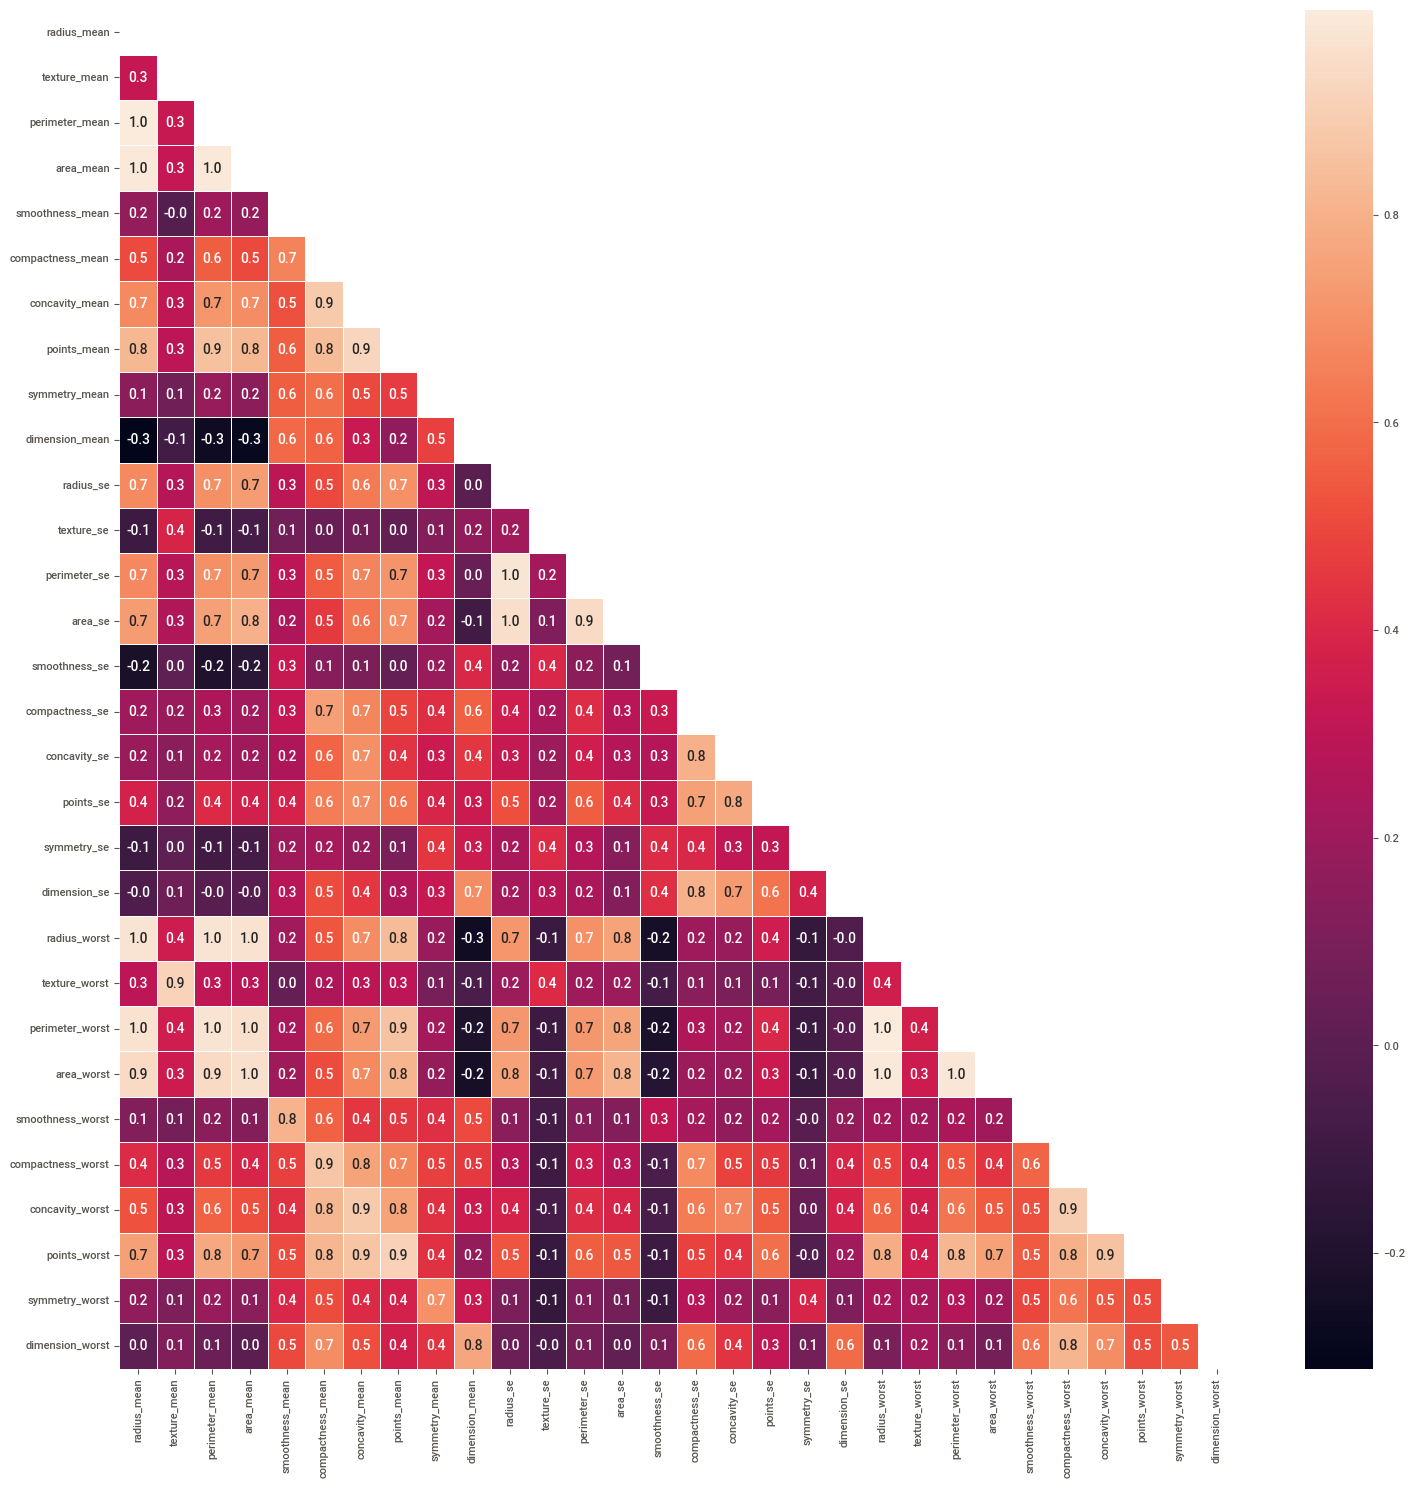

In [12]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(features.corr())
sns.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

<b> Conclusion: </b>
The means, std errors and worst dimension lengths of compactness, concavity and concave points of tumors are highly correlated amongst each other (correlation > 0.8). The mean, std errors and worst dimensions of radius, perimeter and area of tumors have a correlation of 1! texture_mean and texture_worst have a correlation of 0.9. area_worst and area_mean have a correlation of 1.

#### 3.7 Analysing Distribution of Features

In [13]:
skewness = pd.DataFrame(dataset.skew(), columns = ['skewness'])
skewness

,skewness
diagnosis,0.528461
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
points_mean,1.171180
symmetry_mean,0.725609


In [14]:
skewness['skewness'] = ["Positively skewed" if i >= 1 else "Negatively skewed" if i <= -1 else "Normal Distribution" for i in skewness['skewness']]
skewness

,skewness
diagnosis,Normal Distribution
radius_mean,Normal Distribution
texture_mean,Normal Distribution
perimeter_mean,Normal Distribution
area_mean,Positively skewed
smoothness_mean,Normal Distribution
compactness_mean,Positively skewed
concavity_mean,Positively skewed
points_mean,Positively skewed
symmetry_mean,Normal Distribution


<b>There are many skewed features on data. We must solve this issue too. This will be solved via Standardization in Data Preprocessing</b>

#### 3.7 Outlier Analysis

Generating box plots to have an idea of outliers

In [15]:
# melting data for box plot
data_melted = pd.melt(dataset, id_vars = 'diagnosis', var_name = 'feature', value_name = 'value')
data_melted

,diagnosis,feature,value
0,0,radius_mean,12.32000
1,0,radius_mean,10.60000
2,0,radius_mean,11.04000
3,0,radius_mean,11.28000
4,0,radius_mean,15.19000
...,...,...,...
17065,0,dimension_worst,0.06925
17066,0,dimension_worst,0.08488
17067,1,dimension_worst,0.09772
17068,0,dimension_worst,0.07810


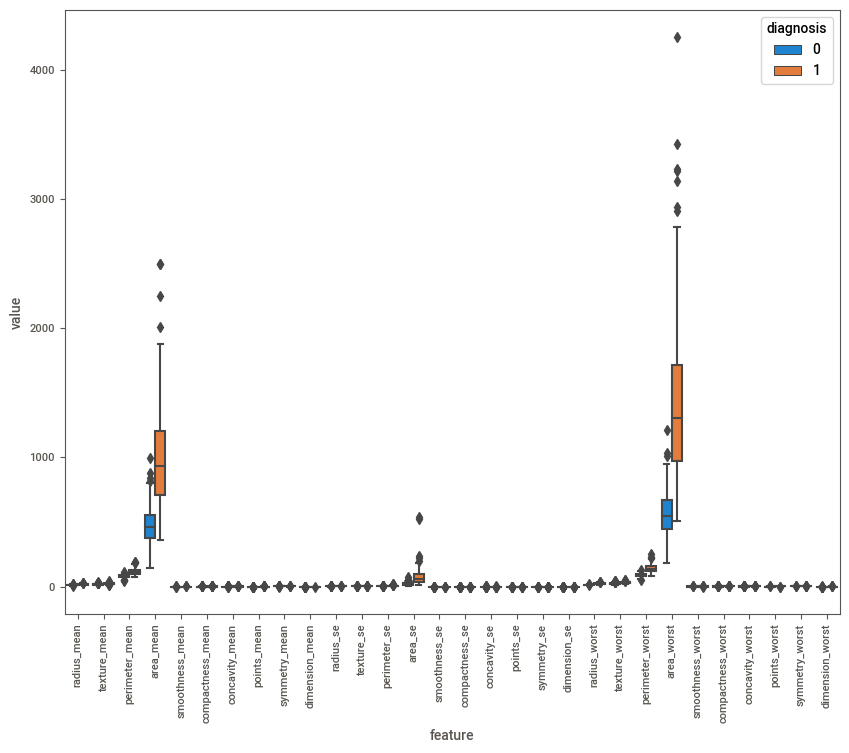

In [16]:
# Box plot to detect outliers
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'feature', y = 'value', hue = 'diagnosis', data = data_melted)
plt.xticks(rotation = 90)
plt.show()

As seen, box plots is a little bit confusing because non-scaled features. We have to normalize the features to solve this issue.

## 4. Data Preprocessing

#### 4.1 Outlier Management

Local Outlier Factor method will be used to detect outliers and drop them
Density based Outlier Detection: Local Outlier Factor (LOF) : Compare local density of one point to local density of its K-NN
LOF > 1 ==> outlier / anomaly
LOF < 1 ==> inlier

In [17]:
y = dataset['diagnosis']
x = dataset.drop(['diagnosis'], axis = 1)
columns = x.columns.tolist()

In [18]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x) # Returns -1 for anomalies/outliers and +1 for inliers.
X_score = clf.negative_outlier_factor_
X_score

array([-0.97288508, -1.06859753, -1.02405645, -1.05016057, -1.08019159,
       -0.98535812, -0.98606513, -1.52185143, -1.00979856, -1.02419529,
       -1.00540365, -0.98595786, -1.04856941, -0.99159205, -1.12905639,
       -1.110468  , -1.0377723 , -1.01405949, -0.9934301 , -0.96000034,
       -0.97757117, -0.97958627, -1.06866756, -1.05606033, -1.00280459,
       -1.1311187 , -0.97403485, -1.1171278 , -0.9989313 , -1.02528095,
       -1.11517805, -1.07010806, -1.0323307 , -1.12620585, -1.06050667,
       -1.07792158, -1.09992001, -0.98073925, -0.97913574, -1.04742045,
       -1.00985919, -1.25009966, -1.59693295, -0.99864842, -1.0203948 ,
       -1.01531891, -1.06233991, -1.83284669, -1.00751196, -0.98844751,
       -1.06845366, -0.96497132, -1.06323429, -1.06067084, -1.72262604,
       -0.95437931, -1.08957483, -1.22919284, -1.86511597, -0.96448423,
       -0.98035055, -1.10530418, -1.36508037, -1.14776543, -1.00120872,
       -0.98301629, -1.01881125, -0.99084022, -1.03475003, -1.04

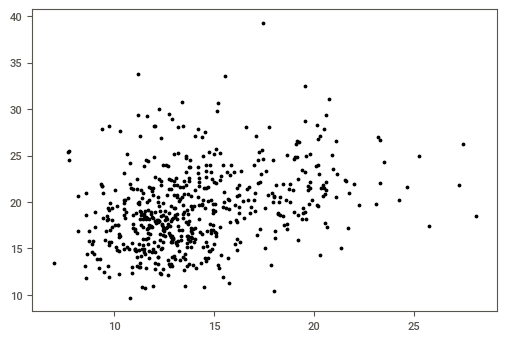

In [19]:
# Plotting points for radius_mean and texture_mean as example plots
plt.figure()
# radius_mean and texture_mean as an example plot
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Point')
plt.show()

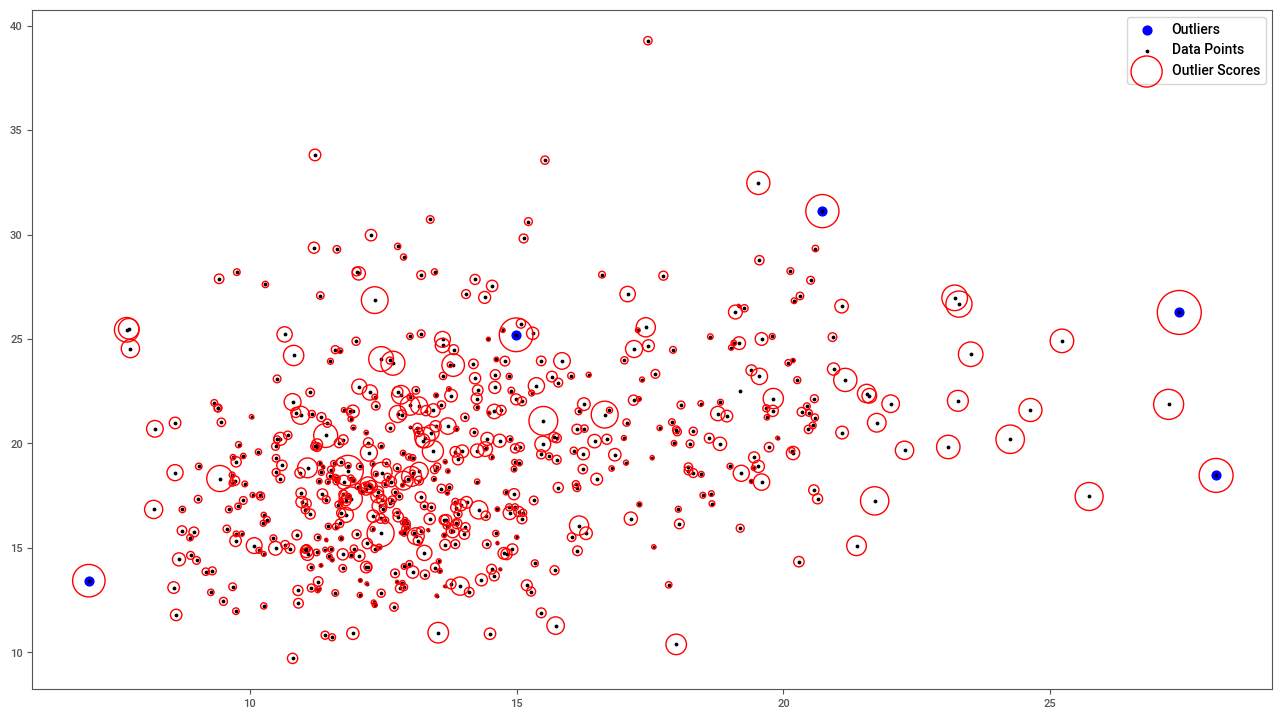

In [20]:
# plotting outliers based on threshold
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

# threshold for negative lof values
threshold = -2
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()

# Let's plot the outliers based on threshold we set
plt.figure(figsize = (16, 9))
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = 'blue', s = 40, label = 'Outliers')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Points')
# Normalization
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())  
plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [21]:
# Drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index)

#### 4.2 Feature Engineering and Selection

From the correlation matrix we saw earlier, it was clear that there are quite a few features with very high correlations. So I dropped one of the features, from each of the feature pairs which had a correlation greater than 0.95. ‘perimeter_mean’, ‘area_mean’, ‘perimeter_se’, ‘area_se’, ‘radius_worst’, ‘perimeter_worst’, ‘area_worst’ were amongst the features that were dropped.

In [22]:
# Create correlation matrix
corr_matrix = x.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
x = x.drop(x[to_drop], axis=1)
# Displaying remaining features
x.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'points_mean', 'symmetry_mean', 'dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'texture_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

## 5. Model Preparation

#### 5.1 Splitting the dataset into Train and Test Sets

In [23]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#### 5.2 Feature Scaling
sklearn’s Robust Scaler was used to scale the features of the dataset. The centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers.

In [24]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 6. Machine Learning Models

### 6.1 DECISION TREE MACHINE LEARNING MODEL

#### 6.1.1 Building Model

In [25]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

#### 6.1.2 Evaluation of the model

In [26]:
#Predict the response for test dataset
y_pred_dt = dt.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of the Decision Tree model is :",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy of the Decision Tree model is : 0.9294117647058824


### 6.2 RANDOM FOREST MACHINE LEARNING MODEL

#### 6.2.1 Building Model

In [27]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

#### 6.2.2 Evaluation of the model

In [28]:
#Predict the response for test dataset
y_pred_rfc = rfc.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of the Random Forest is :",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy of the Random Forest is : 0.9588235294117647


### 6.3 KNN MACHINE LEARNING MODEL

#### 6.3.1 Building Model

In [29]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn2 = KNeighborsClassifier(n_neighbors=2)

In [31]:
knn2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

#### 6.3.2 Evaluation of the Model

In [32]:
#Predict the response for test dataset
y_pred5 = knn2.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of KNN model is:",metrics.accuracy_score(y_test, y_pred5))

Accuracy of KNN model is: 0.9470588235294117


##### Among all models, Randoom Forest has highest accuracy of 0.9588

## 7. Hyper parameter Tuning
We wil now try to tune our model algorithms and see whether is it possible for us to achieve any increase in the accuracy scores by making any changes in the parameter values. The technique that we will be using provides us with the optimum parameter values using which we can get the maximum accuracy possible. Also, there is the possibilty that a new model is found to have the highest accuracy after the paramter tuning is done.

In [33]:
from sklearn.model_selection import GridSearchCV

#### 7.1 Decision Tree Model

In [34]:
parameters = [{'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 
                'max_leaf_nodes': [2,4,6,10,15,30,40,50,100], 'min_samples_split': [2, 3, 4]}]
grid_search = GridSearchCV(estimator = dt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy_dtc = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_dtc)
print(best_parameters)

0.9290384615384616
{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_split': 2}


#### 7.2 Random Forest Model

In [35]:
parameters = [{'n_estimators': [100,200,300],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,25,50,'none'],
               'min_samples_leaf': [1, 2], 
               'min_samples_split': [2, 5]}]
grid_search = GridSearchCV(estimator = rfc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy_rfc = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_rfc)
print(best_parameters)

0.9519871794871794
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


#### 7.3 KNN Model

In [36]:
parameters = [{'n_neighbors': [3,5,7,10,13,15], 'weights': ['uniform', 'distance'],
                'p': [1,2]}]
grid_search = GridSearchCV(estimator = knn2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy_knn = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_knn)
print(best_parameters)

0.962051282051282
{'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}


## 8. Summary :Comparison of Models Before and after Hyper parameters

In [37]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE", "BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)"]
df_pred = {"NAME OF MODEL" : ["DECISION TREE", "RANDOM FOREST", "KNN"],
           "ACCURACY SCORE " : [metrics.accuracy_score(y_test, y_pred_dt), metrics.accuracy_score(y_test, y_pred_rfc),metrics.accuracy_score(y_test, y_pred5)], 
           "BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)" : [best_accuracy_dtc, best_accuracy_rfc,best_accuracy_knn]}
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE,BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)
0,DECISION TREE,0.929412,0.929038
1,RANDOM FOREST,0.958824,0.951987
2,KNN,0.947059,0.962051


#### As can be seen Before, hyper parameter tuning, Random forest is best model but after hyper parameter tuning, KNN is best model

## 9. Cross Validation

Cross-validation (CV) is a technique used to assess a machine learning model and test its performance (or accuracy). It involves reserving a specific sample of a dataset on which the model isn't trained. Later on, the model is tested on this sample to evaluate it.

In [38]:
# Creating array of classifiers called models
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('RF',  RandomForestClassifier(n_estimators=100)))

In [39]:
# Train/Test split 
# The dataset was stratified in order to preserve the proportion of target as in the original dataset, 
# in the train and test datasets as well.
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(x, y, stratify = y, random_state=0)

In [40]:
# Displaying scores of models
names = []
scores = []

for name, model in models:
    model.fit(X_train_cross, y_train_cross)
    y_pred_cross = model.predict(X_test_cross)
    scores.append(accuracy_score(y_test_cross, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.900709
1   DT  0.936170
2   RF  0.957447


In [41]:
# Dividing data into ten blocks, for 10-fold cross-validation.
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)

# Displaying scores of models after 10-fold cross-validation
names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, x, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.913095
1   DT  0.927099
2   RF  0.953728


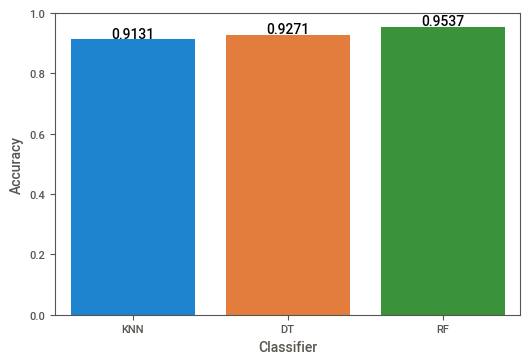

In [42]:
# Plotting the cross validation scores of the machine learning algorithms (KNN, DT, RF)

# Plotting bar graphs for comparision
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

# Displaying Bar charts
plt.show()

It seems to be that RF is the best approach in this case.

## 10. Conclusion:
Result of Hyper Parameter Tuning:
Before, hyper parameter tuning, Random forest is best model but after hyper parameter tuning, KNN is best model
From Cross Validation: 
The Random Forest is the best approach to predict the type of tumor (Benign or Malignant) based on the given dataset.
The Accuracy score of the Random forest model after 10 fold cross validation is 0.9537